In [1]:
from notebook.services.config import ConfigManager
cfm = ConfigManager()
cfm.update('livereveal', {'theme': 'simple',
 'transition': 'convex',
 'start_slideshow_at': 'selected'});

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.answers { 
    visibility: hidden;
}
</style>
""")

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Development/RAQMSandPython/working


# Python for Air Research and Application

## CMAQ
Author: Barron H. Henderson


# Objectives

Hands-on exercises introduce participants to a range of CMAQ analysis techniques and tools, including plotting maps with overlays, converting bpch to netcdf, editing bpch/netcdf files, and evaluating CMAQ against AQSD or ICARTT campaign files.

1. Produce publication quality graphics
2. Perform standard model performance evaluations
3. Create emission perturbations
4. Add custom modifications to each exercise

# Abstract

Attendees will learn how to leverage Python to interact with air pollution-related model and observational data. Air research and application relies on big data. In addition to the challenge presented by data size, researchers must understand a multitude of formats and meta-data standards. For example, CMAQ, CAMx, and GEOS-Chem all use different formats and different meta-data conventions. This tutorial provides format-independent and convention-independent tools.

# Requirements

* Some scripting experience (R, Python, Perl, bash, or csh). Attendees who do not have experience can follow my on-line Python-primer (http://www.barronh.com/software/tutorials/python-tutorial) to satisfy the requiremnt.
* A computer with either
  * Windows, Linux, or Mac; a text editor; and Anaconda 3.5 installed.
  * or a computer and an account on wakari.io
* See http://github.com/barronh/GCandPython/blob/master/PythonInstallation.ipynb

# Download Workshop Materials

1. https://github.com/barronh/RAQMSandPython
2. "Clone or Download"
3. "Download Zip"
4. Move it somewhere good
5. Unzip it



* Fork it.

# With Anaconda

1. Open Anaconda Navigator
2. Open ipython
3. Run the code below


In [4]:
# ipython
!curl -kLO http://github.com/barronh/RAQMSandPython/archive/master.zip
import zipfile
zf = zipfile.ZipFile('master.zip')
zf.extractall()
%mv RAQMSandPython-master GCandPython

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   127    0   127    0     0    579      0 --:--:-- --:--:-- --:--:--  1649
100 17489  100 17489    0     0  42902      0 --:--:-- --:--:-- --:--:-- 42902


# 30 minutes


# Intro to python/ipython/jupyter

1. Options
    - python - least burden on system
    - ipython - least burden on user
    - jupyter - least burden on next user
2. Running interactively python/ipython
    1. Terminal
    2. Integrated Development Environments
    3. Notebook
3. Running saved scripts
    - from terminal `$ python /path/to/file.py`
    - from python `>>> execfile('/path/to/file.py')
    - from ipython `In[1] %run /path/to/file.py`
    - from spyder open in editor
    
*Windows replace `$` with `C:\>`

# Basic Functions

```
def foo(bar):
    """
    foo takes bar and returns the sum of foo and bar
    Arguments:
        bar - a string to add to the string 'foo'
    Returns:
        foo + bar
    """
    return 'foo' + bar
```

- created with def name and call signature followed by colon
- defined by commands following signature until the first unindented command

# Most Useful Function... ever.

`help`:
- `?` in ipython or jupyter
- it will return a docstring for that element or type

# Really Useful Functions

`type`: `type(foo)`
- All things in python are objects (even classes).
- type is a function object that returns the type of another object.

`dir`: `dir(foo)`
- List of methods and properties

`print`:print(a, end ='')
- display representation of object

print(*foo('bar'))


In [5]:
def foo(bar):
    return 'foo.' + bar

In [6]:
print(foo('bar'))

foo.bar


In [7]:
try:
    print(foo(1))
except Exception as e:
    print(e)

Can't convert 'int' object to str implicitly


# Basic Types

`int`, `float`:

- Literals 1 is int, 1. is float
- 64-bit precision values (i.e., float is real*8)

`str`:

- literal '...' or "..."
- multi-line uses triple quotes
- indexed (aka subset) with square braces and "slices"
- version 3 uses system dependent string types (use encode or decode methods0

*A method is a bound function...

# Integers and Floats

In [8]:
1 + 1

2

In [9]:
1 + 1.

2.0

In [10]:
1 / 2.

0.5

In [11]:
1 // 2;

# strings

In [12]:
help("""

""")

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      S.__format__(format_spec) -> str
 |      
 |      Return a formatted version of S as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getatt

In [13]:
"a b c".split()
[1, 's', foo]

[1, 's', <function __main__.foo>]

In [14]:
''.join(['h', 'ow', ' ', 'c', 'an', ' ', 'I ' 'su', 'bse', 't?'])

'how can I subset?'

# slices

slice([start, ]stop[, step]) or [start]:stop[:step]

- slices define the subset in terms of 0-based indices
- stop is the only required element.
- Missing starts are implied (start: 0, end: len(utterable))

# CHECK POINT

How can you rearange the string below to say "this is so fun"? Do not add any letters, use each type of slice.

In [15]:
teststr = 'this is not fun.'
print(teststr[:7], end = ' ')


this is 

# ANSWERS Hidden

<div class="answers">

```
print(teststr[:7], end = ' ')
print(teststr[3:-1:6], end = '')
print(teststr[-5:])
```

</div>

# Iterable Types

lists : [item1, item2, item3, ...]

- created with square braces
- indexed with square braces (indexing is always square braces, not just lists) and "slices"
- tuples are like lists, but defined with parentheses and the items are immutable.

dict : {key1: value1, key2: value2, ...}

- indexed with keys
- iterate keys

# iterables

- strings, lists, dict, and tuples are iterables.
- For any iterable, you can loop over the elements with a for loop
    - Each character in a string...
    - Each item in a list or tuple
    - Each key in a dictionary
- `enumerate` is a special function that returns the element number (0-based) and the element as a tuple

# CHECK POINT

The code below has three parts:

- first cell define a function
- subsequent cells call function
- What are the types and values of a, b, and c?

In [16]:
def foo(pieces):
    out = type(pieces[0])()
    for i, piece in enumerate(pieces):
        out += piece
    return out

In [17]:
a = foo('12345')

In [18]:
b = foo([1, 2, 3, 4, 5])

In [19]:
c = foo({0: 1, 1: 2, 2: 3, 3: 4, 4: 5})

# Intro to numpy/scipy/matplotlib

1. numpy - numerical python (aka, do math fast)
2. scipy - a collection of scientific tools (aka, do stats or solve equations)
3. matplotlib - a library for plotting (aka, make figures for my article)


# numpy

numpy - Numerical Python (numpy.org)

- Fast library for numerical mathematics
- Large array processing (element by element)
- Large matrix processing (using standard matrix)
- Support for masked arrays
- LAPACK for linear algebra


# Make a random "ozone" array

In [20]:
np.random.seed(50)
ozone = (np.random.normal(size = 2*3*4*5) + 40).reshape(2,3,4,5)

In [21]:
print(ozone.ndim)

4


In [22]:
print(ozone.shape, ozone[0, :, 2, 3].shape, ozone[0, :, 2, 3])

(2, 3, 4, 5) (3,) [ 39.66543482  40.48642763  38.50861149]


In [23]:
print(ozone.mean())

39.9511584716


In [24]:
print(np.percentile(ozone, [5, 95]))

[ 38.40819179  41.52552455]


* Which dimension is 2 long? 3 long? 4 long? 5 long?

# Make an "averaging" kernel matrix

In [25]:
averagekernel = np.array([[0.5, 0.35, 0.15],
                          [0.25, 0.5, 0.25],
                          [0.1, 0.4, 0.5]])
averagekernelm = np.matrix(averagekernel)

In [26]:
print(averagekernel.shape)
print(averagekernelm.shape)
print(averagekernelm.T.shape)

(3, 3)
(3, 3)
(3, 3)


In [27]:
averagekernel = np.array([0.25, 0.5, 0.25])
averagekernelm = np.matrix(averagekernel)
averagekernel.shape, averagekernelm.shape, averagekernelm.T.shape

((3,), (1, 3), (3, 1))

* Which dimension is the input layer and which is the output layer?

# Product sums and matrices?

In [28]:
(ozone[0, :, 2, 3] * averagekernel).sum()

39.786725390722133

```
ozone[0, :, 2, 3] * averagekernelm
```

In [29]:
ozone[0, :, 2, 3] * averagekernelm.T

matrix([[ 39.78672539]])

# CHECK POINT

Change the code to operate on all times, latitude, and longitudes without a loop.

In [30]:
out = np.zeros_like(ozone[:, 0])
for t in range(ozone.shape[0]):
    for j in range(ozone.shape[2]):
        for i in range(ozone.shape[3]):
            out[t, j, i] = ozone[t, :, j, i] * averagekernelm.T
out

array([[[ 39.36282997,  40.25207302,  39.85299116,  39.17695003,
          40.00616423],
        [ 39.96880295,  39.57453709,  41.21765252,  39.77559737,
          39.72131962],
        [ 40.38088501,  40.87504393,  40.16600716,  39.78672539,
          40.15137381],
        [ 40.71263105,  40.87507997,  40.94645965,  39.67761914,
          40.4431232 ]],

       [[ 40.5726842 ,  38.83362944,  40.06432046,  37.82883717,
          39.79688735],
        [ 40.40327088,  39.9351408 ,  39.70370031,  39.40573444,
          38.03569959],
        [ 39.99168397,  39.91389171,  40.50004645,  40.61334477,
          41.17862441],
        [ 39.41308569,  39.64410936,  39.87867507,  40.35938726,
          39.04594661]]])

* Hint: Add singleton dimensions to force broadcasting.

# ANSWERS Hidden

<div style="visibility: hidden">

newout = (ozone * averagekernel[None, :, None, None])
(out == out).all()

</div>

# scipy

scipy - Scientific Python (scipy.org)

- Good for physical constants
- Large statistical library
- Large interpolation library
- Including masked array statistics
- Ordinary Differential Equation Solving

In [31]:
from scipy import constants
?constants

In [32]:
from scipy import stats
?stats

In [33]:
from scipy.stats import mstats
?mstats

# Our first statistical test

1. Draw 2 random samples with an equal mean and standard deviation
2. Compare them with a typical Student's t-test

In [34]:
from scipy.stats import ttest_ind
a = np.random.normal(size = 100)
b = np.random.normal(size = 100)
ttest_ind(a, b)

Ttest_indResult(statistic=-0.48157774931483521, pvalue=0.6306377590543939)

# Same thing with masked data

- observations are sometimes missing.
- the example above might provide weird results in that case
- prepare two sample dataset as before; flag some as missing

In [35]:
# Force same results
np.random.seed(1)

# Draw random-ish samples
a = np.random.normal(size = 100)
b = np.random.normal(size = 100)

# Select 25% of the data at random to be missing
missing = np.random.random(size = 100) < .25

# Set the data to a missing flag
b[missing] = -9999

# Now Remove "Missing" Values

In [36]:
# Create a masked array
bm = np.ma.masked_values(b, -9999)

from scipy.stats import ttest_ind
print(ttest_ind(a, bm))
from scipy.stats.mstats import ttest_ind
print(ttest_ind(a, bm))

Ttest_indResult(statistic=4.8187908822920784, pvalue=2.8691204449152638e-06)
Ttest_indResult(statistic=-0.44316616653427898, pvalue=0.65818068293308474)


# What happend to the missing data?

# XKCD, Jelly beans, and Type I Error?
!['So, uh, we did the green study again and got no link. It was probably a--' 'RESEARCH CONFLICTED ON GREEN JELLY BEAN/ACNE LINK; MORE STUDY RECOMMENDED!'](http://imgs.xkcd.com/comics/significant.png)

In [37]:
from scipy.stats import ttest_ind, mannwhitneyu

np.random.seed(1)
mdiffs = []
tdiffs = []
for i in range(20):
    mdifferent = []
    tdifferent = []
    n = 100
    for i in range(n):
        obs = np.exp(np.random.normal(size = 20))
        mod = np.exp(np.random.normal(size = 20))
        tresult = ttest_ind(obs, mod)
        mresult = mannwhitneyu(obs, mod)
        if tresult.pvalue < 0.05:
            tdifferent.append(i);
        if mresult.pvalue < 0.05:
            mdifferent.append(i);

    mdiffs.append(len(mdifferent))
    tdiffs.append(len(tdifferent))
    print(len(mdifferent)/n, end = '/')
    print(len(tdifferent)/n, end = ', ')

mdiffs = np.array(mdiffs)
tdiffs = np.array(tdiffs)

print(mdiffs/tdiffs)

0.12/0.04, 0.09/0.03, 0.11/0.04, 0.1/0.02, 0.05/0.01, 0.08/0.04, 0.05/0.0, 0.1/0.01, 0.08/0.03, 0.1/0.04, 0.09/0.03, 0.07/0.02, 0.07/0.08, 0.03/0.0, 0.07/0.04, 0.15/0.09, 0.12/0.03, 0.1/0.02, 0.1/0.04, 0.06/0.01, [  3.           3.           2.75         5.           5.           2.
          inf  10.           2.66666667   2.5          3.           3.5
   0.875               inf   1.75         1.66666667   4.           5.
   2.5          6.        ]


/Users/barronh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in true_divide


# matplotlib

matplotlib (matplotlib.org; optionally with basemap)

- Plotting library with matlab functionality and naming
- 2-D plotting
    - line plots
    - date plots
    - tile plots
    - contour plots
- 3-D plotting
    - see functionality above.
    - Sometimes harder to work with than 2-D.

# Super Simple Example

Populating the interactive namespace from numpy and matplotlib


/Users/barronh/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


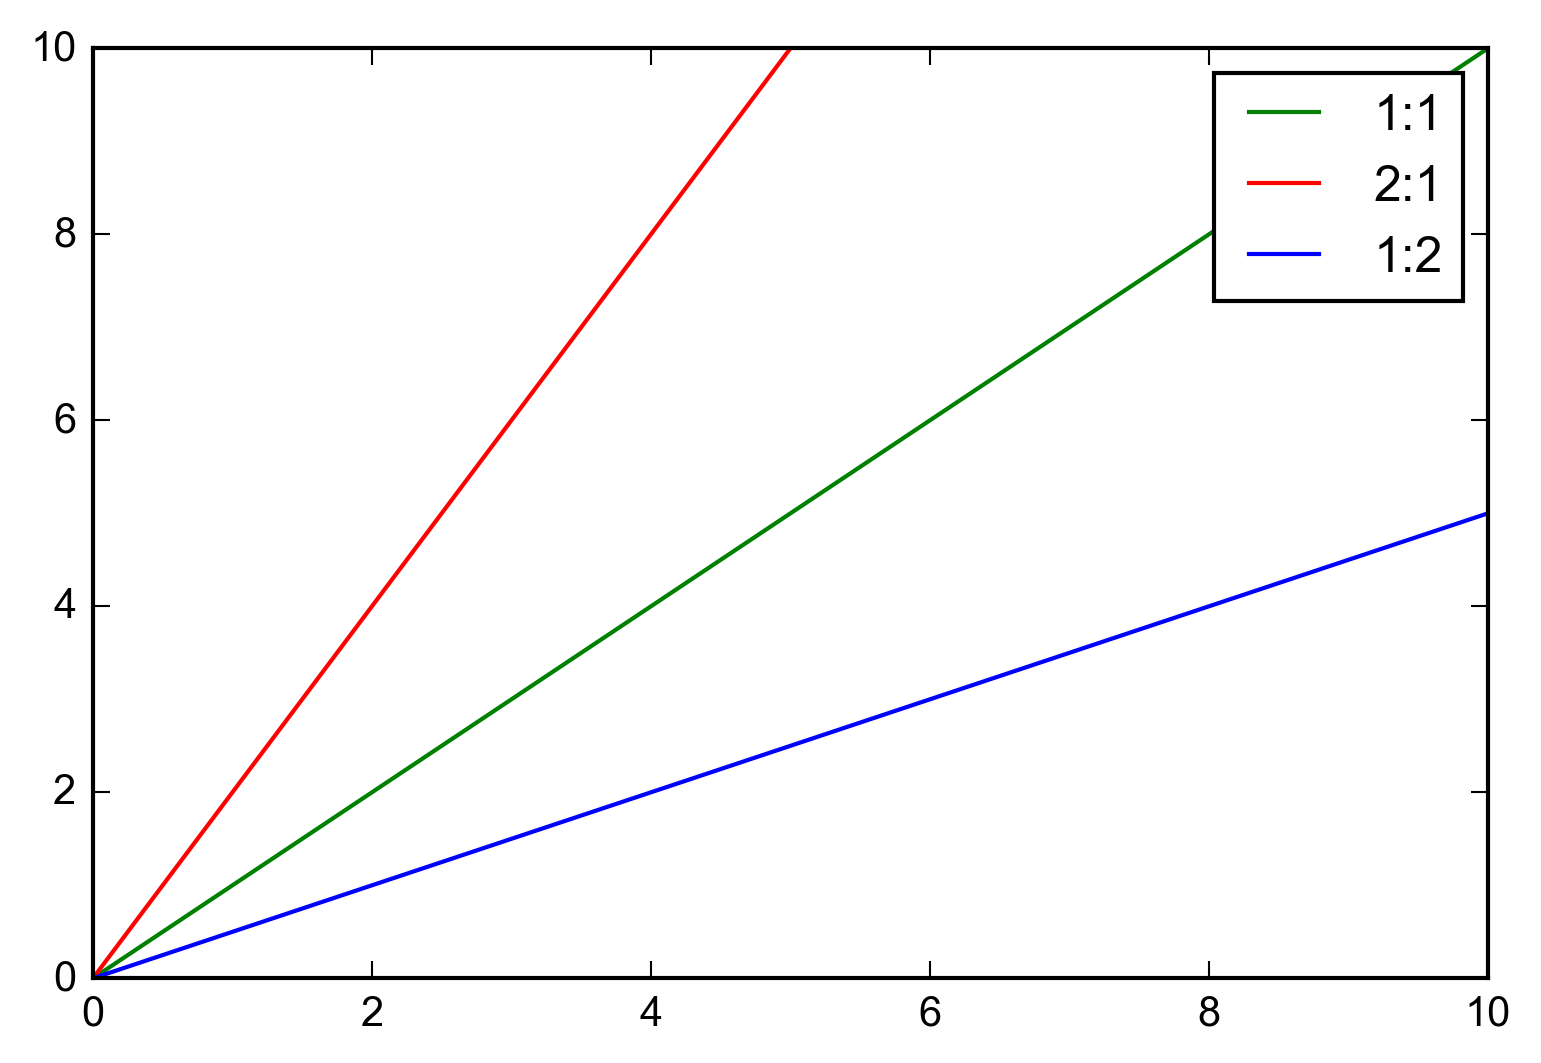

In [38]:
%pylab inline
# from matplotlib.pyplot import *
close()
plot([0,10], [0,10], linestyle = '-', color = 'g', label = '1:1')
plot([0,5], [0,10], linestyle = '-', color = 'r', label = '2:1')
plot([0,10], [0,5], linestyle = '-', color = 'b', label = '1:2')
legend();
#savefig('temp.png')

# Saved scripts are really important!

In [39]:
?%save

In [40]:
?%run

In [41]:
%save -f test.py 5-20

The following commands were written to file `test.py`:
def foo(bar):
    return 'foo.' + bar
print(foo('bar'))
try:
    print(foo(1))
except Exception as e:
    print(e)
1 + 1
1 + 1.
1 / 2.
1 // 2;
help("""

""")
"a b c".split()
[1, 's', foo]
''.join(['h', 'ow', ' ', 'c', 'an', ' ', 'I ' 'su', 'bse', 't?'])
teststr = 'this is not fun.'
print(teststr[:7], end = ' ')
def foo(pieces):
    out = type(pieces[0])()
    for i, piece in enumerate(pieces):
        out += piece
    return out
a = foo('12345')
b = foo([1, 2, 3, 4, 5])
c = foo({0: 1, 1: 2, 2: 3, 3: 4, 4: 5})
np.random.seed(50)
ozone = (np.random.normal(size = 2*3*4*5) + 40).reshape(2,3,4,5)


In [42]:
run test.py

foo.bar
Can't convert 'int' object to str implicitly
Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      S.__format__(format_spec) -> str
 |      
 |      Return a formatted version of S as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  

NameError: name 'np' is not defined

# Explore the saved file

This section is complete